In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA
from datetime import datetime


In [2]:
# Load data into Panda DataFrames
df_wine = pd.read_csv("wine_data.csv")
df_chicken = pd.read_csv("chickwts_data.csv")
df_arrests = pd.read_csv("arrests_data.csv")

# Wine Data EDA & Preprocessing

In [3]:
# Check shape, info, description and first five rows of wine dataset.
print(df_wine.shape)
print(df_wine.info())
print(df_wine.describe())
print(df_wine.head())

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64


In [4]:
# Get count of null values per column
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [5]:
# Check unique values in target column
df_wine["target"].unique()

array([0, 1, 2])

In [6]:
# Get all columns and drop the target column to a list
wine_columns = df_wine.columns.tolist()
wine_columns.remove("target")

<Figure size 1500x1000 with 0 Axes>

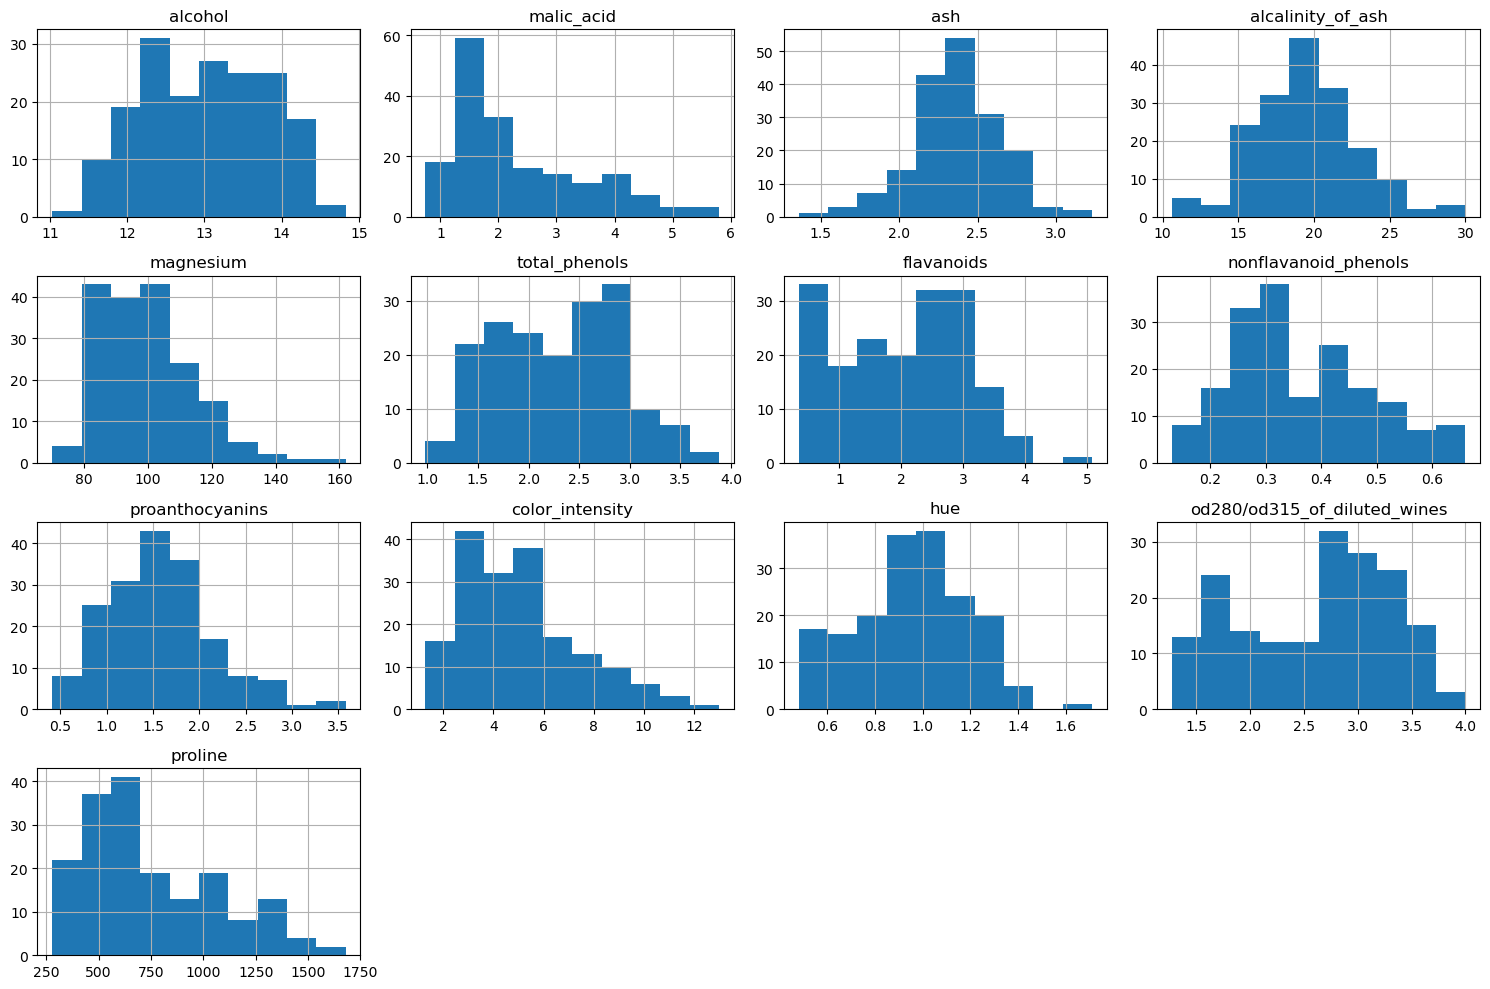

In [7]:
# Visually display numerical column data distributions
plt.figure(figsize=(15, 10))
df_wine[wine_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show();

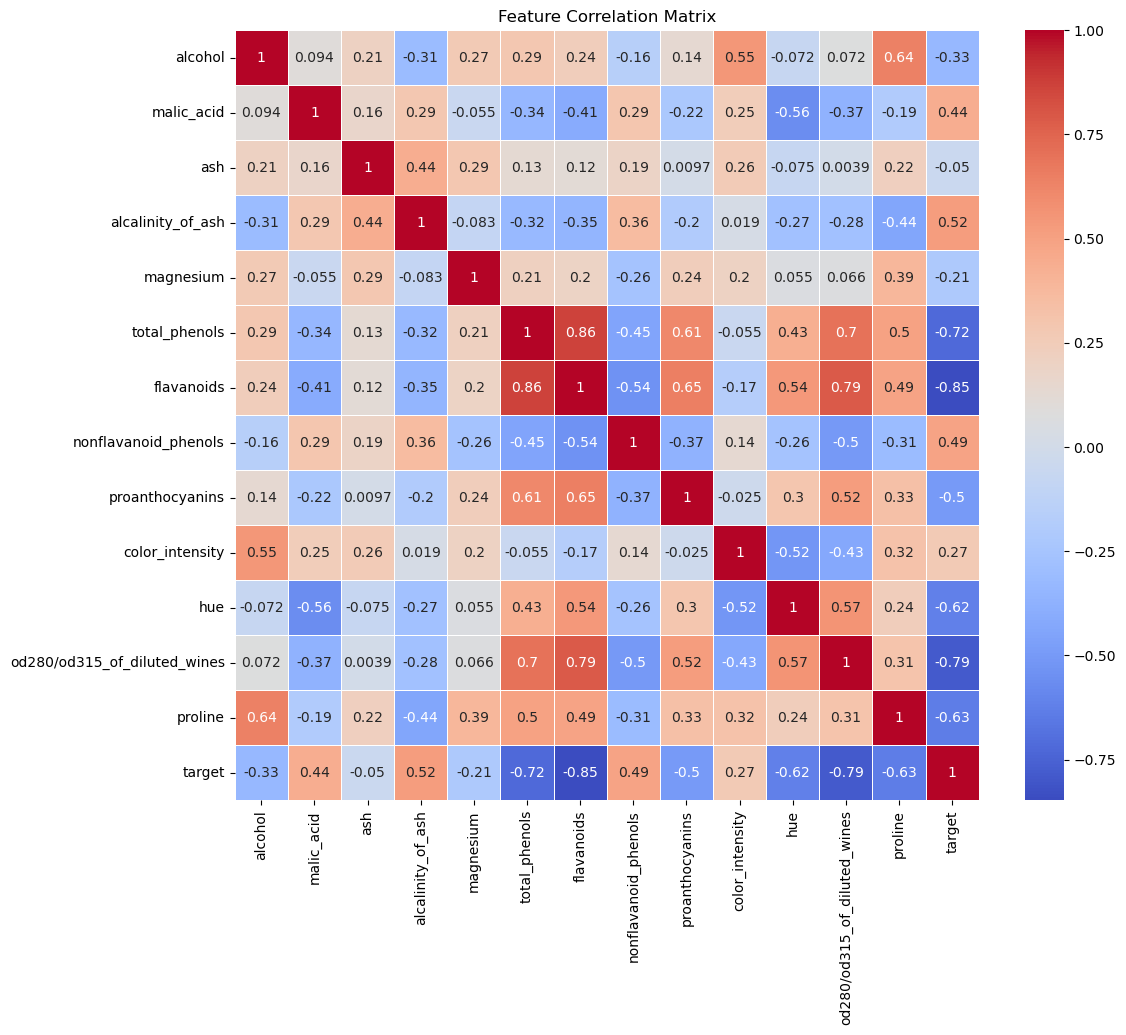

In [8]:
# Visually see correlation matrix for numerical columns
wine_corr = df_wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(wine_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show();

In [9]:
#Split wine data and scale numerical columns
X = df_wine.drop(columns=['target'])
y = df_wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chicken Weight EDA & Data Preprocessing

In [10]:
#Check shape, info, description, and first five rows of chicken weight dataset
print(df_chicken.shape)
print(df_chicken.info())
print(df_chicken.describe())
print(df_chicken.head())

(100, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-nu

In [11]:
# Get count of null values in columns
df_chicken.isnull().sum()

feed_name              0
proteinContent         0
fatContent             0
fiberContent           0
calciumContent         0
phosphorusContent      0
moistureContent        0
ashContent             0
metabolizableEnergy    0
lysineContent          0
methionineContent      0
particleSize           0
density                0
price                  0
shelfLife              0
weight                 0
dtype: int64

In [12]:
#Check how many unique feed names there are
len(df_chicken["feed_name"].unique())

100

In [13]:
# Print first 5 rows again
df_chicken.head()

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
1,ChickStart Plus,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,20.588235
2,EarlyGrow Formula,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,20.909091
3,HatchMate Premier,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,23.125000
4,PeepNourish,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,22.068966


In [14]:
# Get all numerical columns and remove the feed name from it as its categorical
chicken_columns = df_chicken.columns.to_list()
chicken_columns.remove("feed_name")

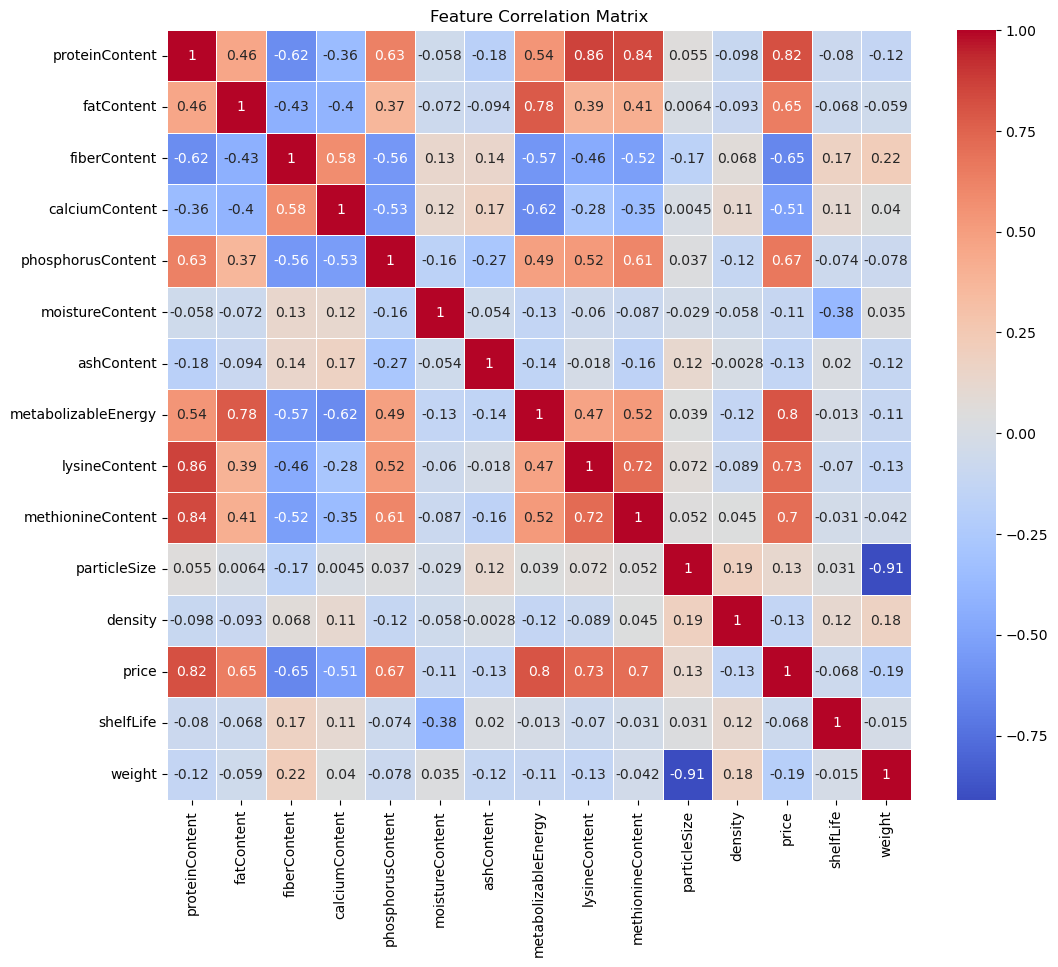

In [15]:
# Visualize the correlation matrix
chicken_corr = df_chicken[chicken_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(chicken_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show();

<Figure size 1500x1000 with 0 Axes>

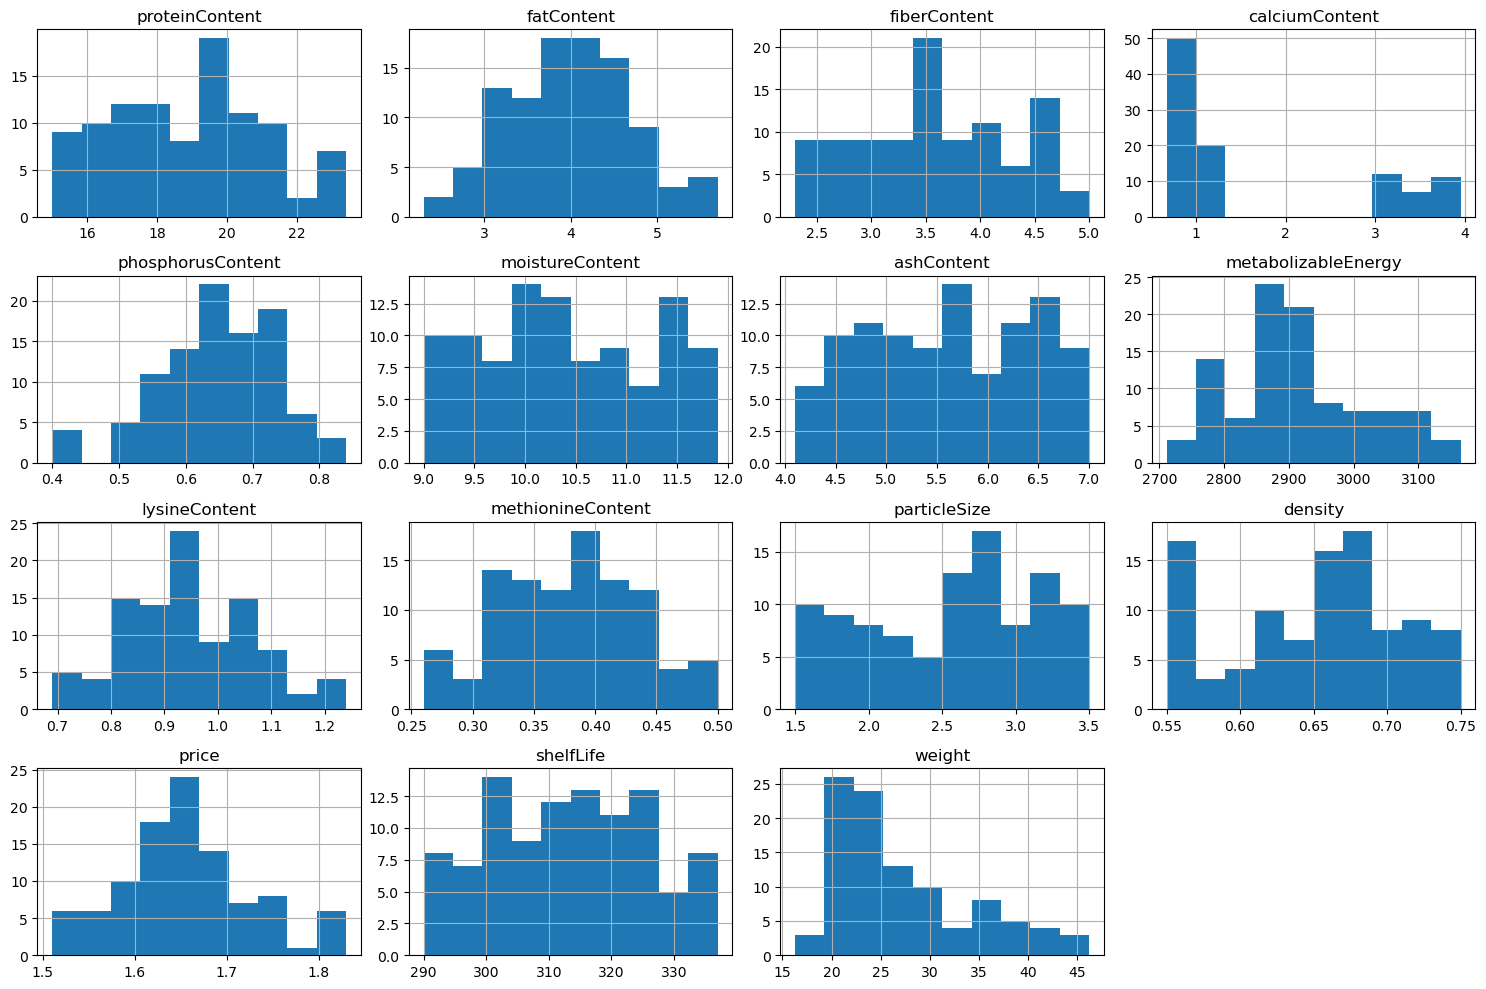

In [16]:
# Visually inspect data distribution for numerical columns
plt.figure(figsize=(15, 10))
df_chicken[chicken_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show();

In [17]:

chick_columns = df_chicken.columns.to_list()
chick_columns.remove("feed_name")

scaler=StandardScaler()
df_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=chick_columns)
df_chicken_scaled["feed_name"] = df_chicken["feed_name"]



# Arrests EDA & Data Preprocessing

In [18]:
# Check DF shape, info, description, and first five rows
print(df_arrests.shape)
print(df_arrests.info())
print(df_arrests.describe())
print(df_arrests.head())

(50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        5

In [19]:
# Check for null values
df_arrests.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [20]:
#Look at unamed column for unique values
len(df_arrests['Unnamed: 0'].unique())

50

In [21]:
# Get numerical features
arrest_columns = df_arrests.columns.to_list()
arrest_columns.remove("Unnamed: 0")
arrest_columns

['Murder', 'Assault', 'UrbanPop', 'Rape']

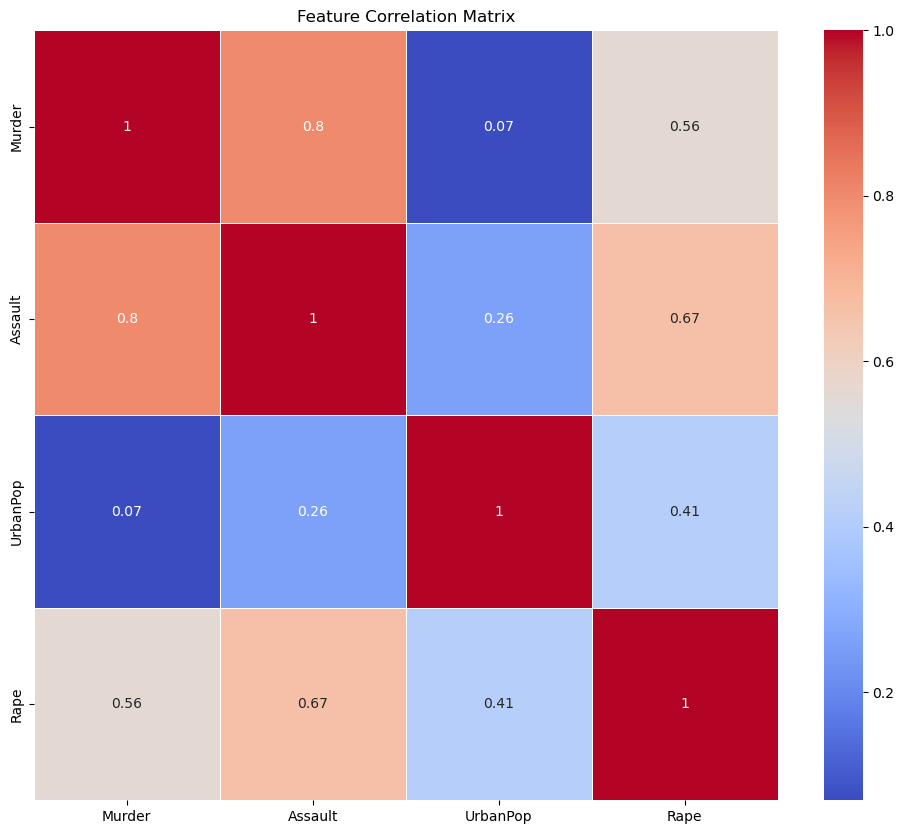

In [22]:
# Correlation Matrix for numerical features
arrest_corr = df_arrests[arrest_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(arrest_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show();

<Figure size 1500x1000 with 0 Axes>

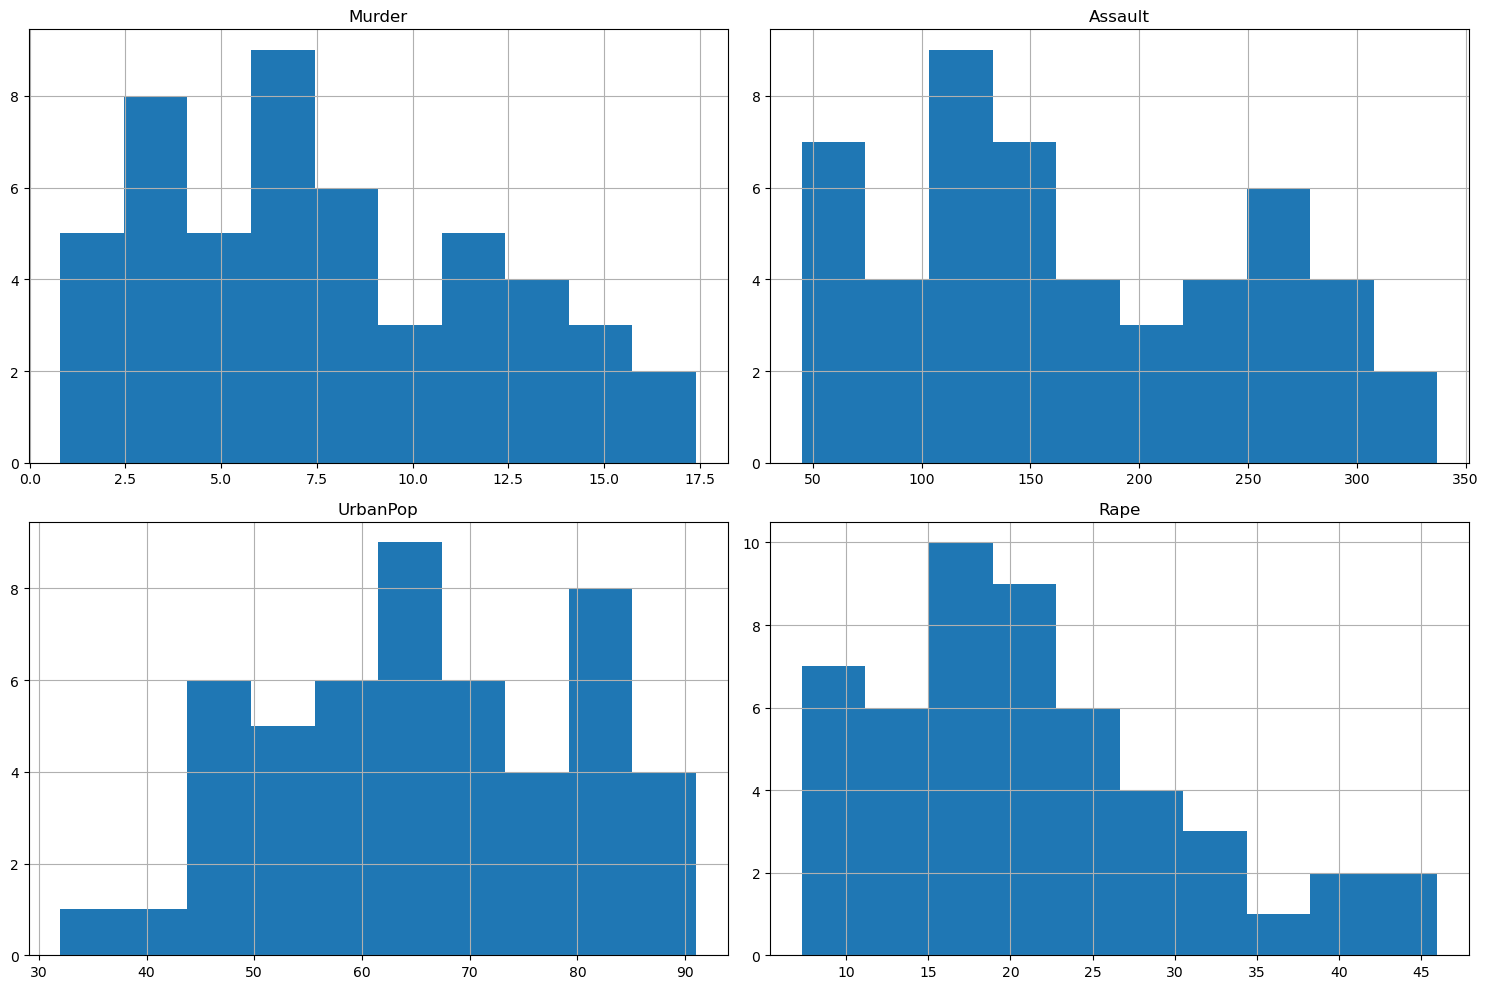

In [23]:
#Histograms to see data dispersion of numerical data
plt.figure(figsize=(15, 10))
df_arrests[arrest_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show();

In [24]:
# Create a dataframe of only numerical characters - to be used during analysis
df_arrest_num = df_arrests[arrest_columns]

# Scale the data in the numerical dataframe - to be used during analysis below
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_arrest_num), columns=df_arrest_num.columns)


# KNN implementation

In [25]:
#Create PCA to have 95% variance
pca = PCA(n_components=0.95)

#Train the data based on the scaled data and same for test data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [26]:
#Return the variance ratios eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.3639525 , 0.18617733, 0.11864674, 0.07373451, 0.06839018,
       0.04537892, 0.03742704, 0.02655729, 0.02292711, 0.01925003])

In [27]:
#Sum of variance ratios
cumulative_variance = np.cumsum(explained_variance_ratio)

cumulative_variance

array([0.3639525 , 0.55012983, 0.66877657, 0.74251108, 0.81090127,
       0.85628018, 0.89370722, 0.92026451, 0.94319162, 0.96244165])

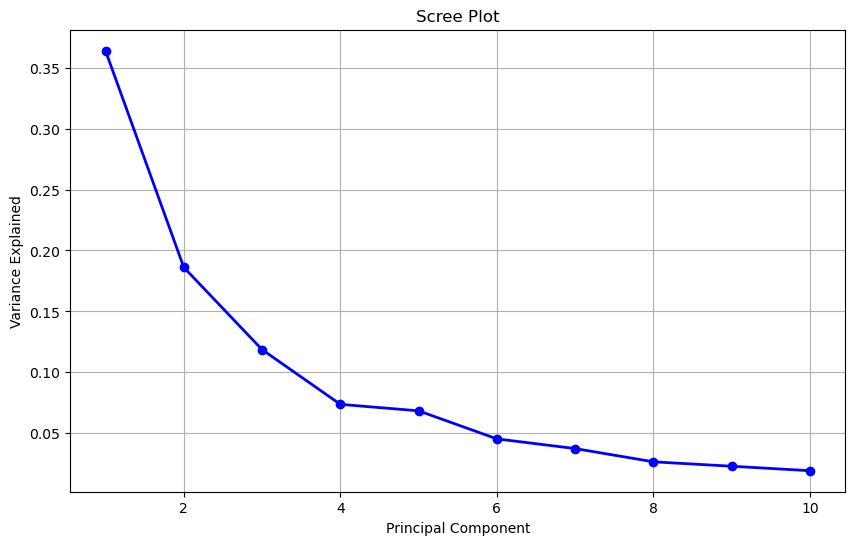

In [28]:
# Scree plot to display eigenvalues
plt.figure(figsize=(10, 6))
scree_plot = plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

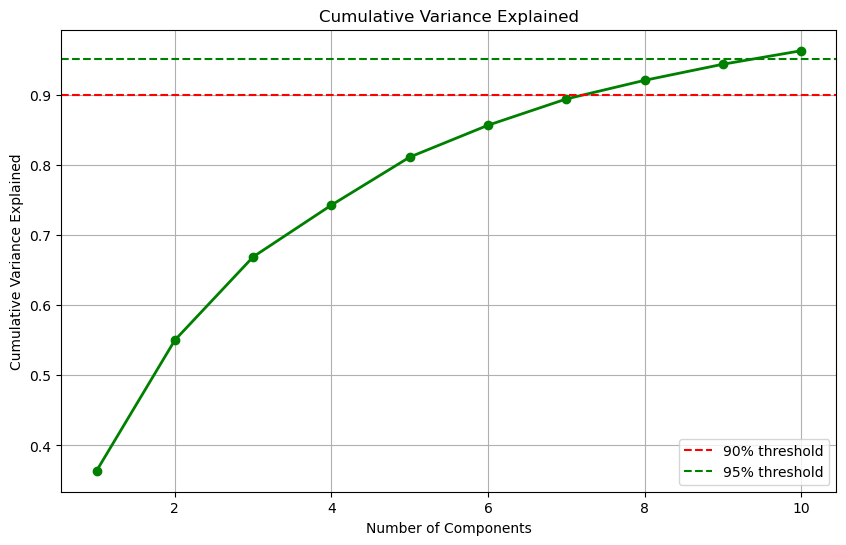

In [29]:
# Create a cumulative variance plot
plt.figure(figsize=(10, 6))
cum_var_plot = plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'o-', linewidth=2, color='green')
# Add lines for 90% and 95% thresholds
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()



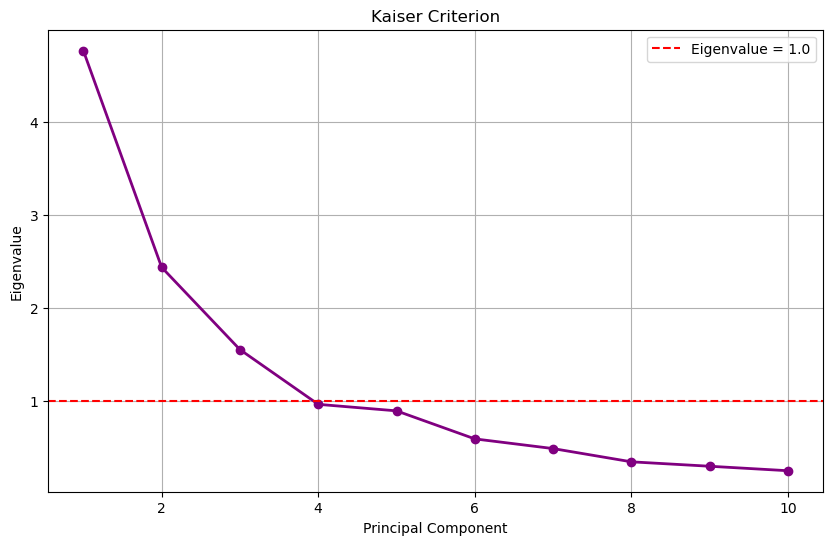

In [30]:
# Create a Kaiser criterion plot (eigenvalues > 1) - This was just to visualize.  Not needed
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10, 6))
kaiser_plot = plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 
         'o-', linewidth=2, color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', label='Eigenvalue = 1.0')
plt.title('Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#Grid search for best variables for KNN

#Parameters
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

#Initial KNN
knn = KNeighborsClassifier()

#Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

#Best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.9549857549857549


In [32]:
#Create a grid search for just Mahalanobis

# Compute covariance matrix from training data
cov_matrix = np.cov(X_train_pca, rowvar=False)

# Compute the inverse covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)


param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'metric': ['mahalanobis'],
    'metric_params': [{'VI': inv_cov_matrix}]
}

# Initialize k-NN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search_mah = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search_mah.fit(X_train_pca, y_train)

# Get best parameters
grid_search_mah.best_score_



0.8954415954415955

In [33]:
#Get the best model
knn_best = grid_search.best_estimator_

#Fit the best model
knn_best.fit(X_train_pca, y_train)

#Predcit values
y_pred = knn_best.predict(X_test_pca)

#Get the accuracy score
accuracy_score(y_test, y_pred)

0.9555555555555556

In [34]:
#Classification Report of the model
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94        18
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



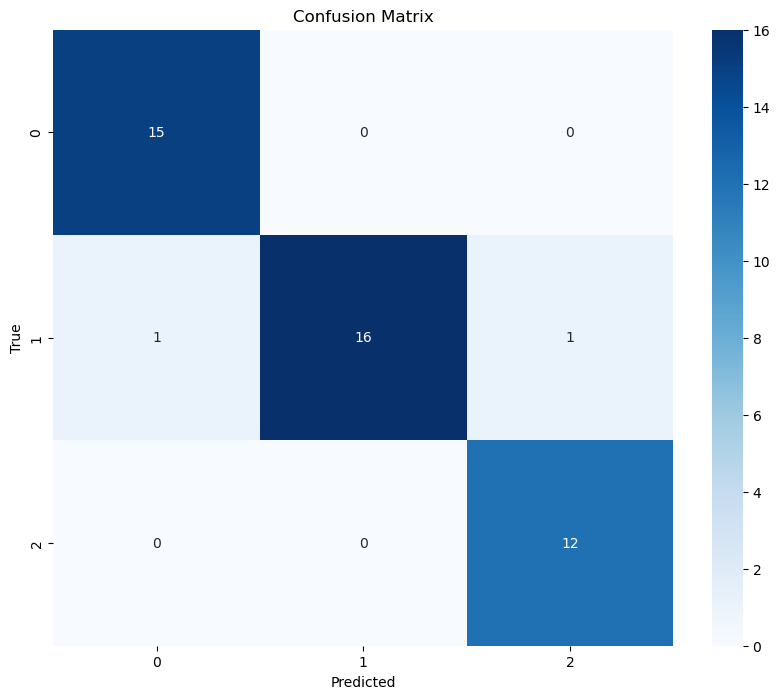

In [35]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#df_chicken = pd.read_csv("chickwts_data.csv")

In [37]:
"""

df_chicken = pd.read_csv("chickwts_data.csv")

chick_columns = df_chicken.columns.to_list()
chick_columns.remove("feed_name")

scaler = StandardScaler()
#df_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=features, index=df_chicken['feed_name'])

df_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=chick_columns)
df_chicken_scaled['feed_name'] = df_chicken['feed_name']
#df_chicken["weight_scaled"] = scaler.fit_transform(df_chicken[["weight"]])

"""

'\n\ndf_chicken = pd.read_csv("chickwts_data.csv")\n\nchick_columns = df_chicken.columns.to_list()\nchick_columns.remove("feed_name")\n\nscaler = StandardScaler()\n#df_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=features, index=df_chicken[\'feed_name\'])\n\ndf_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=chick_columns)\ndf_chicken_scaled[\'feed_name\'] = df_chicken[\'feed_name\']\n#df_chicken["weight_scaled"] = scaler.fit_transform(df_chicken[["weight"]])\n\n'

# Chicken Feed Recommendation

In [38]:
# Checking DF info again to have it closer for visualization
df_chicken.info()
df_chicken_scaled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   feed_name            100 non-null    object 
 1   proteinContent       100 non-null    float64
 2   fatContent           100 non-null    float64
 3   fiberContent         100 non-null    float64
 4   calciumContent       100 non-null    float64
 5   phosphorusContent    100 non-null    float64
 6   moistureContent      100 non-null    float64
 7   ashContent           100 non-null    float64
 8   metabolizableEnergy  100 non-null    int64  
 9   lysineContent        100 non-null    float64
 10  methionineContent    100 non-null    float64
 11  particleSize         100 non-null    float64
 12  density              100 non-null    float64
 13  price                100 non-null    float64
 14  shelfLife            100 non-null    int64  
 15  weight               100 non-null    floa

,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight,feed_name
0,0.299692,-1.122064,-1.727057,-0.724283,1.464631,0.449419,-1.359796,0.095343,0.143492,0.958191,1.680497,-1.441706,0.804604,-1.449466,-1.541437,FirstPeck
1,-0.322672,-0.269863,0.442613,1.152981,0.356741,-1.315316,1.541102,-0.453958,0.392322,-0.158148,1.507428,0.915801,0.223662,-0.894115,-0.930850,ChickStart Plus
2,0.203944,0.866404,-0.569900,-0.400028,0.467530,-0.256475,0.211524,0.379802,0.889983,0.027908,1.334359,0.734454,-0.066808,1.406624,-0.885316,EarlyGrow Formula
3,0.634811,-0.411897,0.297968,1.272444,-0.197205,1.155313,0.090653,-0.444149,1.387643,0.027908,1.161291,1.641188,0.804604,-1.687473,-0.570848,HatchMate Premier
4,0.156070,-0.127830,0.876547,1.187113,-0.418783,-1.315316,0.332395,-0.503003,-0.271225,-0.716318,0.642085,-0.172279,0.223662,-0.338764,-0.720714,PeepNourish


In [39]:
# Get the column names without feed_name.  Previously grabbed before during EDA and preperation
features = chick_columns

# Create PCA and set n_components=1 and add to DF
pca = PCA(n_components=1)
df_chicken_scaled['PCA_component'] = pca.fit_transform(df_chicken_scaled[features])


print("Explained Variance Ratio:", pca.explained_variance_ratio_)
df_chicken_scaled['PCA_component']

Explained Variance Ratio: [0.38122879]


0     2.165341
1    -0.437253
2     1.194280
3     0.247816
4    -0.956156
        ...   
95   -0.416088
96   -0.354069
97    3.529036
98   -1.369059
99    0.765590
Name: PCA_component, Length: 100, dtype: float64

In [40]:

# Cosine similarity for the df_chicken_scaled)
similarity_matrix = cosine_similarity(df_chicken_scaled.drop(columns=['feed_name']))

#Create a DataFrame out of it
similarity_df = pd.DataFrame(similarity_matrix, index=df_chicken_scaled['feed_name'], columns=df_chicken_scaled['feed_name'])


#View the matrix
similarity_matrix

array([[ 1.00000000e+00, -3.10181102e-02,  2.59142681e-01, ...,
         4.54004911e-01,  1.00893218e-04, -2.34026980e-01],
       [-3.10181102e-02,  1.00000000e+00,  1.68033711e-01, ...,
        -3.42809496e-01, -4.29546958e-01, -1.20247841e-01],
       [ 2.59142681e-01,  1.68033711e-01,  1.00000000e+00, ...,
         5.90081511e-01, -7.10303191e-01,  4.57591266e-01],
       ...,
       [ 4.54004911e-01, -3.42809496e-01,  5.90081511e-01, ...,
         1.00000000e+00, -4.06954154e-01,  4.31054483e-01],
       [ 1.00893218e-04, -4.29546958e-01, -7.10303191e-01, ...,
        -4.06954154e-01,  1.00000000e+00, -4.58036304e-01],
       [-2.34026980e-01, -1.20247841e-01,  4.57591266e-01, ...,
         4.31054483e-01, -4.58036304e-01,  1.00000000e+00]])

In [41]:
#similarity_df

In [42]:
df_chicken.head()

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
1,ChickStart Plus,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,20.588235
2,EarlyGrow Formula,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,20.909091
3,HatchMate Premier,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,23.125000
4,PeepNourish,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,22.068966


In [43]:
#scaler = StandardScaler()
#df_chicken['weight_scaled'] = scaler.fit_transform(df_chicken[['weight']])


In [44]:
features = df_chicken.columns.to_list()
features.remove("weight")
features.remove("feed_name")


In [45]:
# Apply PCA with one principal component
#pca = PCA(n_components=1)
#df_chicken['PCA1'] = pca.fit_transform(df_chicken[features])

# Check explained variance ratio
#print("Explained Variance Ratio:", pca.explained_variance_ratio_)


In [46]:
# Visually display top recommendations compared to first peck
df_chicken[(df_chicken['feed_name'] == 'FirstPeck') | (df_chicken['feed_name'] == 'FeatherUp Complete') | (df_chicken['feed_name'] == 'MarketPrep Formula') | (df_chicken['feed_name'] == 'HatchRate Pro') | (df_chicken['feed_name'] == "LayMore Gold") | (df_chicken['feed_name'] == "BroilerComplete Plus")]

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
18,FeatherUp Complete,19.6,4.0,2.7,1.19,0.77,10.7,5.1,2936,1.00,0.39,2.7,0.65,1.71,298,24.074074
33,LayMore Gold,21.3,4.6,2.3,0.94,0.60,9.5,6.4,2921,1.05,0.38,3.3,0.68,1.74,316,20.606061
63,BroilerComplete Plus,19.4,3.9,3.7,0.86,0.62,10.8,6.6,2918,1.07,0.35,3.0,0.65,1.71,306,21.666667
67,MarketPrep Formula,23.4,4.3,2.4,1.04,0.83,10.2,4.9,3100,1.11,0.50,2.6,0.72,1.80,308,27.692308
80,HatchRate Pro,20.9,3.5,2.6,1.07,0.62,10.2,6.0,2854,1.00,0.46,3.1,0.72,1.66,322,23.225806


In [47]:
#sim_matrix = cosine_similarity(df_chicken[['pca_component']])

#sim_matrix = cosine_similarity(df_chicken)

#sim_df = pd.DataFrame(sim_matrix, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

#sim_matrix

In [48]:
def recommend_feeds(feed_name, top_n=5):
    #similar_feeds = sim_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    similar_feeds = similarity_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds



In [49]:
# This is the recommendation that accounts for all data in the DF plus an additional column for the PCA component added to the dataframe

recommended_feeds = recommend_feeds("FirstPeck",10)
print("Recommended Feeds:\n", recommended_feeds)

Recommended Feeds:
 feed_name
FeatherUp Complete      0.838427
BroilerPlus Advanced    0.724512
ShellMax Enhanced       0.685196
StartRight Formula      0.677370
EggToChick Plus         0.657959
FinishRight Premium     0.596303
BroilerBoost Supreme    0.590088
WeightGain Pro          0.589544
FineMeat Formula        0.586330
MarketPrep Formula      0.583220
Name: FirstPeck, dtype: float64


# Arrests Implementation

In [50]:
df_arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
# Create PCA with length of 4 since there are 4 numerical columns
pca = PCA(n_components=len(df_scaled.columns))
pca.fit(df_scaled)

# Get feature importance and sort in order greatest to smallest
feature_importance = pd.Series(pca.components_[0], index=df_scaled.columns).abs().sort_values(ascending=False)

#Get top three features
top_features = feature_importance.index[:3]



In [52]:
# Create PCA with 2 components PC1 and PC2
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled[top_features]), columns = ['PC1', 'PC2'])

In [53]:

pca.explained_variance_ratio_

array([0.7861934 , 0.15268378])

In [54]:
#Loop through K values to see the best K.  Store inertia in wcss to dispaly at the end
wcss = []
k_value = range(1,10)

for k in k_value:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

np.mean(wcss)

32.91482809972929

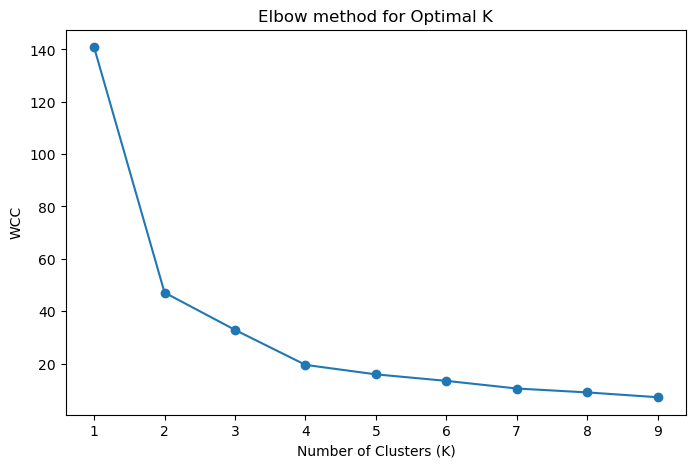

In [55]:
# Display the elbow curve

plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCC")
plt.title("Elbow method for Optimal K")
plt.show()

In [56]:
# AIC and BIC scores for GMM to get best k value
bic_scores = []
aic_scores = []

for k in k_value:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(df_pca)
    bic_scores.append(gmm.bic(df_pca))
    aic_scores.append(gmm.aic(df_pca))



<function matplotlib.pyplot.show(close=None, block=None)>

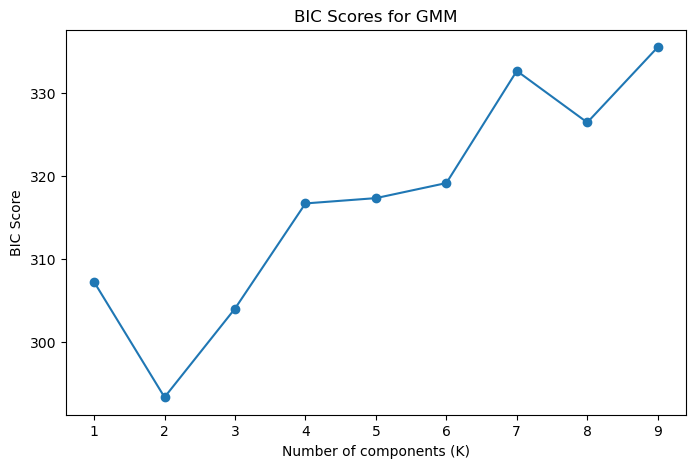

In [57]:
# Plot BIC to find optimal K
plt.figure(figsize=(8,5))
plt.plot(k_value, bic_scores, marker='o', linestyle='-', label='BIC')
plt.xlabel("Number of components (K)")
plt.ylabel("BIC Score")
plt.title("BIC Scores for GMM")
plt.show

In [58]:
# Optimal K is 2 for both
optimal_k = 2

#KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_arrests["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

#Gaussian
gmm = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10)
df_arrests["GMM_Cluster"] = gmm.fit_predict(df_scaled)
df_arrests["GMM_Probability"] = gmm.predict_proba(df_scaled).max(axis=1)


In [59]:
#Silhouette scores
silhouette_kmeans = silhouette_score(df_scaled, df_arrests["KMeans_Cluster"])
silhouette_gmm = silhouette_score(df_scaled, df_arrests['GMM_Cluster'])

round(silhouette_kmeans, 4), round(silhouette_gmm, 4)

(0.4085, 0.4048)

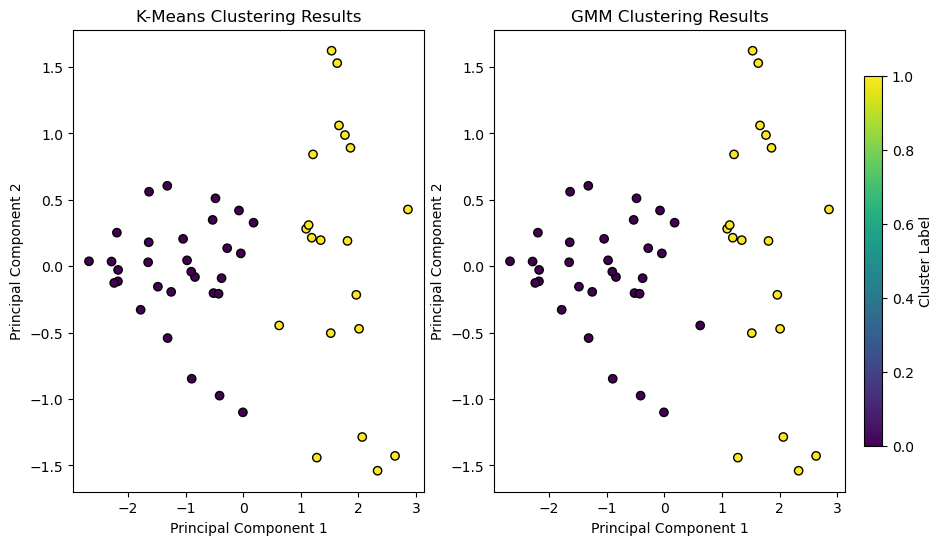

In [60]:
#Plot results next to each other to view

fig, ax = plt.subplots(1,2, figsize=(12, 6))


ax[0].scatter(df_pca['PC1'], df_pca['PC2'], c=df_arrests["KMeans_Cluster"], cmap='viridis', marker='o', edgecolor='k')
ax[0].set_xlabel("Principal Component 1")
ax[0].set_ylabel("Principal Component 2")
ax[0].set_title("K-Means Clustering Results")

sc2 = ax[1].scatter(df_pca['PC1'], df_pca['PC2'], c=df_arrests["GMM_Cluster"], cmap='viridis', marker='o', edgecolor='k')
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")
ax[1].set_title("GMM Clustering Results")

cbar = fig.colorbar(sc2, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)
cbar.set_label("Cluster Label")


plt.show()

In [100]:
df_arrests_high = df_arrests[(df_arrests['KMeans_Cluster'] == 1) & (df_arrests['GMM_Cluster'] == 1)]
df_arrests_low = df_arrests[(df_arrests['KMeans_Cluster'] == 0) & (df_arrests['GMM_Cluster'] == 0)]
df_arrests_mixed = df_arrests[(df_arrests['KMeans_Cluster'] != df_arrests['GMM_Cluster'])]

In [104]:
len(df_arrests_high) + len(df_arrests_low) + len(df_arrests_mixed) == 50

True

In [105]:
df_arrests_high

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,KMeans_Cluster,GMM_Cluster,GMM_Probability
0,Alabama,13.2,236,58,21.2,1,1,0.995661
1,Alaska,10.0,263,48,44.5,1,1,1.000000
2,Arizona,8.1,294,80,31.0,1,1,0.995965
4,California,9.0,276,91,40.6,1,1,0.999798
5,Colorado,7.9,204,78,38.7,1,1,0.995555
8,Florida,15.4,335,80,31.9,1,1,0.997990
9,Georgia,17.4,211,60,25.8,1,1,0.999981
12,Illinois,10.4,249,83,24.0,1,1,0.725001
17,Louisiana,15.4,249,66,22.2,1,1,0.999838
19,Maryland,11.3,300,67,27.8,1,1,0.998326


In [106]:
df_arrests_low

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,KMeans_Cluster,GMM_Cluster,GMM_Probability
3,Arkansas,8.8,190,50,19.5,0,0,0.993861
6,Connecticut,3.3,110,77,11.1,0,0,1.000000
7,Delaware,5.9,238,72,15.8,0,0,0.997847
10,Hawaii,5.3,46,83,20.2,0,0,1.000000
11,Idaho,2.6,120,54,14.2,0,0,1.000000
13,Indiana,7.2,113,65,21.0,0,0,0.999998
14,Iowa,2.2,56,57,11.3,0,0,1.000000
15,Kansas,6.0,115,66,18.0,0,0,1.000000
16,Kentucky,9.7,109,52,16.3,0,0,0.999949
18,Maine,2.1,83,51,7.8,0,0,1.000000


In [107]:
df_arrests_mixed

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,KMeans_Cluster,GMM_Cluster,GMM_Probability
24,Missouri,9.0,178,70,28.2,1,0,0.921633


## MORE CHICKEN - Only Weight Scaled, 1 PCA component for all features (including weight), Cosine on only PCA results, results are 1.0 or -1.0

In [61]:
# reset DF chicken
df_chicken = pd.read_csv("chickwts_data.csv")

#Get column names, drop feed_name
chick_columns = df_chicken.columns.to_list()
chick_columns.remove("feed_name")


#Scale the weight data to new column, weight_scaled
scaler = StandardScaler()
df_chicken["weight_scaled"] = scaler.fit_transform(df_chicken[["weight"]])


#df_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=features, index=df_chicken['feed_name'])

#df_chicken_scaled = pd.DataFrame(scaler.fit_transform(df_chicken[chick_columns]), columns=chick_columns)
#df_chicken_scaled['feed_name'] = df_chicken['feed_name']


In [62]:
# Reget column names without weight and feed_name into variable features
features = df_chicken.columns.to_list()
features.remove("weight")
features.remove('feed_name')

#PCA 1 component
new_pca = PCA(n_components=1)

#PCA results into variable X_PCA
X_PCA = new_pca.fit_transform(df_chicken[features])


print("Explained Variance Ratio:", new_pca.explained_variance_ratio_)

Explained Variance Ratio: [0.984282]


In [63]:
# Cosine similarity on PCA compnonet
similarity_matrix = cosine_similarity(X_PCA)
similarity_df = pd.DataFrame(similarity_matrix, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

In [64]:
#recommendation function
def recommend_feeds2(feed_name, top_n=5):
    #similar_feeds = sim_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    similar_feeds = similarity_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

#Recommendation Test, showing 50 results
recommended_feeds2 = recommend_feeds2("FirstPeck",50)
print("Recommended Feeds:\n", recommended_feeds2)

Recommended Feeds:
 feed_name
MarketPrep Formula         1.0
ShellMax Enhanced          1.0
YolkPerfect Premium        1.0
LayWell Complete           1.0
EggStream Formula          1.0
ShellBuilder Pro           1.0
GrowthBurst Formula        1.0
MuscleBuilder Pro          1.0
BroilerPlus Advanced       1.0
BroilerBulk Ultra          1.0
BroilerCharge Complete     1.0
FastFinish Formula         1.0
BroilerComplete Plus       1.0
FinishRight Premium        1.0
LayMore Gold               1.0
ReadyWeight Complete       1.0
MarketMax Formula          1.0
MarketReady Formula        1.0
FineMeat Formula           1.0
ClutchBoost Supreme        1.0
FertileEgg Premium         1.0
ReproSuccess Formula       1.0
HatchMore Premium          1.0
BreederPerfect Plus        1.0
ReproNutrient Formula      1.0
FertileSupport Enhanced    1.0
BreederOptimal Formula     1.0
ShellStrength Pro          1.0
BreederAdvance Complete    1.0
FirstFeather Nutrition     1.0
NestStart Gold             1.0
Hatchling

# Checking PCA for multiple components, everything scaled

In [65]:
#Copy chicken df without feed_name
df_chick_trunc = df_chicken.drop(columns=['feed_name'])

#Get columns
chicks = df_chick_trunc.columns.to_list()

# Scale all data
scaler = StandardScaler()
df_chicken_scaled2 = pd.DataFrame(scaler.fit_transform(df_chick_trunc))


#df_chicken["weight_scaled"] = scaler.fit_transform(df_chicken[["weight"]])
#df_chicken_scaled2['feed_name'] = df_chicken['feed_name']



In [66]:
# New blank PCA
pca2 = PCA()

#Fit he scaled data
pca2.fit_transform(df_chicken_scaled2)

explained_variance_ratio = pca2.explained_variance_ratio_

explained_variance_ratio

array([3.60551810e-01, 1.79077046e-01, 8.98474439e-02, 7.56741932e-02,
       6.58301896e-02, 6.02782723e-02, 5.00348957e-02, 3.30394266e-02,
       2.45997360e-02, 2.10484605e-02, 1.55682745e-02, 1.23393169e-02,
       6.86449778e-03, 3.85187897e-03, 1.39455850e-03, 2.17488782e-33])

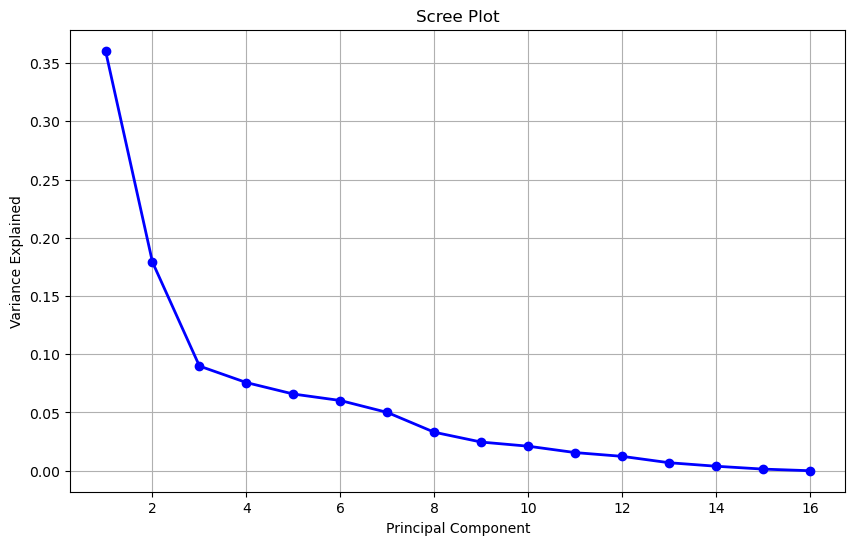

In [67]:
#Scree plot for PCA component numbers
plt.figure(figsize=(10, 6))
scree_plot = plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Chicken - Everything scaled, only 1 PCA component, using Cosine Similarity - All results are 1.0 or -1.0

In [68]:
df_chicken.head()

#Scale entire dataset
scaler = StandardScaler()
df_chick_scaled = scaler.fit_transform(df_chicken.drop(columns=['feed_name']))


In [69]:
pca_scaled = PCA(n_components=1)

scaled_pca = pca_scaled.fit_transform(df_chick_scaled)

pca_scaled.explained_variance_ratio_

array([0.36055181])

In [70]:
scaled_cos_matrix = cosine_similarity(scaled_pca)

df_scaled_matrix = pd.DataFrame(scaled_cos_matrix, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

df_scaled_matrix

feed_name,FirstPeck,ChickStart Plus,EarlyGrow Formula,HatchMate Premier,PeepNourish,NestStart Gold,FledglingBlend,ChickBoost Complete,HatchlingEssentials,FirstFeather Nutrition,...,EggQuality Enhanced,BreederPerfect Plus,ReproNutrient Formula,FecundityBoost Complete,BreederVital Premium,FertileSupport Enhanced,HatchPro Complete,BreederOptimal Formula,ClutchPower Premium,BreederAdvance Complete
feed_name,,,,,,,,,,,,,,,,,,,,,
FirstPeck,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
ChickStart Plus,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
EarlyGrow Formula,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
HatchMate Premier,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
PeepNourish,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FertileSupport Enhanced,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
HatchPro Complete,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
BreederOptimal Formula,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


In [71]:
def recommend_feeds_scaled(feed_name, top_n=5):
    #similar_feeds = sim_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    similar_feeds = df_scaled_matrix[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

recommended_feeds_scaled = recommend_feeds_scaled("FirstPeck", 50)
print("Recommended Feeds:\n", recommended_feeds_scaled)

Recommended Feeds:
 feed_name
LayMore Gold               1.0
EggBoost Supreme           1.0
PeakLay Advanced           1.0
ShellMax Enhanced          1.0
LayWell Complete           1.0
ShellBuilder Pro           1.0
GrowthBurst Formula        1.0
BroilerPlus Advanced       1.0
MeatMaker Premium          1.0
BroilerBulk Ultra          1.0
WeightGain Pro             1.0
BroilerCharge Complete     1.0
FastFinish Formula         1.0
BroilerComplete Plus       1.0
FinalPhase Complete        1.0
LastStage Enhanced         1.0
MarketPrep Formula         1.0
FinishRight Premium        1.0
ReadyWeight Complete       1.0
FinalBoost Premium         1.0
FineMeat Formula           1.0
HatchRate Pro              1.0
BreederPrime Formula       1.0
ClutchBoost Supreme        1.0
FertileEgg Premium         1.0
BreederElite Complete      1.0
HatchMore Premium          1.0
FertilityMax Formula       1.0
ReproNutrient Formula      1.0
BreederOptimal Formula     1.0
ShellStrength Pro          1.0
BroilerBo

# Chicken - All data scaled, PCA one component, using Euclidean Distance

In [72]:
pca_scaled.explained_variance_ratio_

array([0.36055181])

In [73]:
distance_matrix = euclidean_distances(scaled_pca)

euclidean_distance_df = pd.DataFrame(distance_matrix, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

euclidean_distance_df

feed_name,FirstPeck,ChickStart Plus,EarlyGrow Formula,HatchMate Premier,PeepNourish,NestStart Gold,FledglingBlend,ChickBoost Complete,HatchlingEssentials,FirstFeather Nutrition,...,EggQuality Enhanced,BreederPerfect Plus,ReproNutrient Formula,FecundityBoost Complete,BreederVital Premium,FertileSupport Enhanced,HatchPro Complete,BreederOptimal Formula,ClutchPower Premium,BreederAdvance Complete
feed_name,,,,,,,,,,,,,,,,,,,,,
FirstPeck,0.000000,2.658122,1.058917,2.046280,3.223783,1.711740,2.113069,2.232724,2.859085,2.228206,...,2.765321,4.082758,1.401621,4.960841,3.377991,2.906660,2.660327,1.115389,3.797561,1.608465
ChickStart Plus,2.658122,0.000000,1.599205,0.611841,0.565661,0.946382,0.545053,0.425398,5.517206,4.886327,...,0.107199,1.424636,1.256500,2.302720,0.719869,0.248538,0.002205,3.773511,1.139439,1.049657
EarlyGrow Formula,1.058917,1.599205,0.000000,0.987363,2.164866,0.652822,1.054152,1.173807,3.918002,3.287123,...,1.706404,3.023841,0.342704,3.901924,2.319074,1.847743,1.601410,2.174306,2.738644,0.549548
HatchMate Premier,2.046280,0.611841,0.987363,0.000000,1.177502,0.334541,0.066788,0.186444,4.905365,4.274486,...,0.719040,2.036477,0.644659,2.914561,1.331711,0.860380,0.614046,3.161670,1.751280,0.437816
PeepNourish,3.223783,0.565661,2.164866,1.177502,0.000000,1.512043,1.110714,0.991059,6.082868,5.451988,...,0.458462,0.858975,1.822162,1.737058,0.154208,0.317123,0.563456,4.339172,0.573778,1.615318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FertileSupport Enhanced,2.906660,0.248538,1.847743,0.860380,0.317123,1.194921,0.793591,0.673936,5.765745,5.134866,...,0.141339,1.176098,1.505039,2.054181,0.471331,0.000000,0.246333,4.022049,0.890901,1.298195
HatchPro Complete,2.660327,0.002205,1.601410,0.614046,0.563456,0.948587,0.547258,0.427603,5.519412,4.888532,...,0.104994,1.422431,1.258706,2.300514,0.717664,0.246333,0.000000,3.775716,1.137234,1.051862
BreederOptimal Formula,1.115389,3.773511,2.174306,3.161670,4.339172,2.827129,3.228458,3.348113,1.743696,1.112816,...,3.880710,5.198147,2.517010,6.076230,4.493380,4.022049,3.775716,0.000000,4.912950,2.723854


In [74]:
#Recommendation function using euclidean distance.  Smaller the value, the better
def euclidean_recommendation(feed_name, top_n=5):
    if feed_name not in euclidean_distance_df.index:
        raise ValueError(f"{feed_name} not found in feed list.")
    distances = euclidean_distance_df[feed_name].sort_values()
    return distances.iloc[1:top_n+1]

euclidean_recommendations = euclidean_recommendation("FirstPeck",50)
print("Recommended Feeds: ]n", euclidean_recommendations)
    

Recommended Feeds: ]n feed_name
StartRight Formula         0.027313
LayMore Gold               0.082643
ReadyWeight Complete       0.148574
FertilityMax Formula       0.286784
FinishRight Premium        0.368405
FeatherUp Complete         0.502136
EggMaster Premium          0.565495
EggToChick Plus            0.606714
PeakLay Advanced           0.735162
LayWell Complete           0.871430
GrowthBurst Formula        0.944489
HatchMore Premium          0.948811
FinalPhase Complete        0.999904
FertileEgg Premium         1.051731
EarlyGrow Formula          1.058917
TeenChick Formula          1.074053
BreederOptimal Formula     1.115389
HatchRate Pro              1.176168
MeatMaker Premium          1.179288
EggBoost Supreme           1.208864
BroilerBoost Supreme       1.210540
BroilerPlus Advanced       1.288049
ReproNutrient Formula      1.401621
LastStage Enhanced         1.506469
RapidGrow Complete         1.508252
BreederAdvance Complete    1.608465
BreederElite Complete      1.664

# Weight Scaled only, All other data (excluding weight) to 1 PCA component combined with scaled weight, cosine similarity used

In [75]:
df_chicken2 = df_chicken.copy()

scaler = StandardScaler()
weight_scaled = scaler.fit_transform(df_chicken2[['weight']])

In [76]:
# GEt column names, no weight
pca_features = df_chicken2.columns.to_list()
pca_features.remove("feed_name")
pca_features.remove("weight")
#pca_features.remove("weight_scaled")

#PCA 1 component
pca_noweight = PCA(n_components=1)

#Get PCA results on all columns excluding weight
noweight = pca_noweight.fit_transform(df_chicken2[pca_features])

print(pca_noweight.explained_variance_ratio_)

#Combine PCA and Scaled weight
combined = np.hstack((noweight, weight_scaled))

#reframe to a DF with feed_name
combined_df = pd.DataFrame(combined, columns=['PC1', 'weight_scaled'], index=df_chicken['feed_name'])

#view DF
combined_df

[0.984282]


,PC1,weight_scaled
feed_name,,
FirstPeck,9.765798,-1.541437
ChickStart Plus,-46.274263,-0.930850
EarlyGrow Formula,38.700068,-0.885316
HatchMate Premier,-45.237743,-0.570848
PeepNourish,-51.274445,-0.720714
...,...,...
FertileSupport Enhanced,94.714613,0.546722
HatchPro Complete,-36.291094,-0.616970
BreederOptimal Formula,220.709032,-0.162846


In [77]:
weight_similarity_matrix = cosine_similarity(combined_df)
weight_similarity_df = pd.DataFrame(weight_similarity_matrix, index=df_chicken2['feed_name'], columns=df_chicken2['feed_name'])

weight_similarity_df

feed_name,FirstPeck,ChickStart Plus,EarlyGrow Formula,HatchMate Premier,PeepNourish,NestStart Gold,FledglingBlend,ChickBoost Complete,HatchlingEssentials,FirstFeather Nutrition,...,EggQuality Enhanced,BreederPerfect Plus,ReproNutrient Formula,FecundityBoost Complete,BreederVital Premium,FertileSupport Enhanced,HatchPro Complete,BreederOptimal Formula,ClutchPower Premium,BreederAdvance Complete
feed_name,,,,,,,,,,,,,,,,,,,,,
FirstPeck,1.000000,-0.984436,0.991079,-0.985725,-0.985482,0.995126,0.987377,0.985161,0.988440,0.987513,...,-0.996162,0.984757,0.988901,-0.990887,-0.985844,0.986855,-0.984978,0.987886,-0.988479,0.987949
ChickStart Plus,-0.984436,1.000000,-0.999076,0.999972,0.999982,-0.996968,-0.999845,-0.999991,-0.999701,-0.999830,...,0.996040,-0.999998,-0.947399,0.999137,0.999966,-0.999897,0.999995,-0.999783,0.999695,-0.999774
EarlyGrow Formula,0.991079,-0.999076,1.000000,-0.999370,-0.999318,0.999391,0.999678,0.999247,0.999828,0.999699,...,-0.998941,0.999154,0.960277,-0.999999,-0.999395,0.999590,-0.999205,0.999755,-0.999833,0.999764
HatchMate Premier,-0.985725,0.999972,-0.999370,1.000000,0.999999,-0.997524,-0.999949,-0.999994,-0.999856,-0.999940,...,0.996679,-0.999984,-0.949771,0.999420,1.000000,-0.999977,0.999990,-0.999911,0.999852,-0.999905
PeepNourish,-0.985482,0.999982,-0.999318,0.999999,1.000000,-0.997422,-0.999933,-0.999998,-0.999831,-0.999923,...,0.996561,-0.999991,-0.949320,0.999370,0.999998,-0.999966,0.999996,-0.999891,0.999826,-0.999885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FertileSupport Enhanced,0.986855,-0.999897,0.999590,-0.999977,-0.999966,0.997982,0.999995,0.999948,0.999949,0.999991,...,-0.997213,0.999922,0.951891,-0.999630,-0.999981,1.000000,-0.999937,0.999979,-0.999946,0.999976
HatchPro Complete,-0.984978,0.999995,-0.999205,0.999990,0.999996,-0.997206,-0.999895,-0.999999,-0.999772,-0.999882,...,0.996312,-0.999999,-0.948391,0.999261,0.999987,-0.999937,1.000000,-0.999843,0.999767,-0.999835
BreederOptimal Formula,0.987886,-0.999783,0.999755,-0.999911,-0.999891,0.998374,0.999995,0.999861,0.999993,0.999997,...,-0.997677,0.999819,0.953866,-0.999786,-0.999920,0.999979,-0.999843,1.000000,-0.999993,1.000000


In [78]:
#Recommendation function
def recommendation_weight(feed_name, top_n=5):
    if feed_name not in weight_similarity_df.index:
        raise ValueError(f"{feed_name} not found in feed list.")
    similar_feeds = weight_similarity_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds


weight_recommendations = recommendation_weight("FirstPeck", 50)
print("Recommended Feeds: ]n", weight_recommendations)

Recommended Feeds: ]n feed_name
BroilerComplete Plus       0.999131
LayMore Gold               0.998098
BroilerPlus Advanced       0.996715
NestStart Gold             0.995126
LayWell Complete           0.992072
MuscleBuilder Pro          0.991230
EarlyGrow Formula          0.991079
FeatherUp Complete         0.990364
StartRight Formula         0.990220
FinishRight Premium        0.990191
YolkPerfect Premium        0.989742
MarketMax Formula          0.989293
ReproNutrient Formula      0.988901
HatchMore Premium          0.988766
GrowthMax Complete         0.988729
EggToChick Plus            0.988578
BroilerBulk Ultra          0.988531
ShellMax Enhanced          0.988513
HatchlingEssentials        0.988440
ChickLaunch Pro            0.988403
EggStream Formula          0.988172
FineMeat Formula           0.988166
BreederAdvance Complete    0.987949
BreederOptimal Formula     0.987886
FertileEgg Premium         0.987772
MarketPrep Formula         0.987707
JuvenileBlend Plus         0.987

# Weight Scaled only, All data combined into 1 PCA component, Cosine Similarity used (This is how the project instructions asks for it - or well how i read it)

In [79]:
df_chicken_weight = df_chicken.copy()

#Scaled weight saved into new column in DF
df_chicken_weight['weight_scaled'] = scaler.fit_transform(df_chicken_weight[['weight']])

#Normal weight dropped from DF
df_chicken_weight = df_chicken_weight.drop(columns=['weight', 'feed_name'])

df_chicken_weight

,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight_scaled
0,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,-1.541437
1,18.2,3.8,3.9,3.02,0.68,9.3,6.9,2865,0.99,0.37,3.4,0.70,1.67,302,-0.930850
2,19.3,4.6,3.2,1.20,0.69,10.2,5.8,2950,1.05,0.38,3.3,0.69,1.65,331,-0.885316
3,20.2,3.7,3.8,3.16,0.63,11.4,5.7,2866,1.11,0.38,3.2,0.74,1.71,292,-0.570848
4,19.2,3.9,4.2,3.06,0.61,9.3,5.9,2860,0.91,0.34,2.9,0.64,1.67,309,-0.720714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.4,4.5,3.5,0.70,0.63,10.1,4.7,3006,0.90,0.29,2.0,0.62,1.63,300,0.546722
96,19.7,3.3,4.0,3.27,0.63,10.0,5.0,2875,1.06,0.40,2.5,0.57,1.63,319,-0.616970
97,22.1,4.5,3.1,0.82,0.74,10.0,4.5,3132,1.02,0.44,2.5,0.65,1.76,334,-0.162846
98,17.4,3.4,4.5,0.95,0.64,11.6,4.1,2885,0.82,0.33,2.0,0.56,1.65,300,0.120981


In [80]:
# Get the PCA for all components
pca_wweight = PCA(n_components=1)

#Fit and Transform data into PCA variable
with_weight_pca = pca_wweight.fit_transform(df_chicken_weight)

pca_wweight.explained_variance_ratio_

array([0.984282])

In [81]:
#Get the cosine similarity - all 1's and -1's
weight_similarity_cosine = cosine_similarity(with_weight_pca)

#Transform to DF
pca_weight_similarity_df = pd.DataFrame(weight_similarity_cosine, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])


pca_weight_similarity_df

feed_name,FirstPeck,ChickStart Plus,EarlyGrow Formula,HatchMate Premier,PeepNourish,NestStart Gold,FledglingBlend,ChickBoost Complete,HatchlingEssentials,FirstFeather Nutrition,...,EggQuality Enhanced,BreederPerfect Plus,ReproNutrient Formula,FecundityBoost Complete,BreederVital Premium,FertileSupport Enhanced,HatchPro Complete,BreederOptimal Formula,ClutchPower Premium,BreederAdvance Complete
feed_name,,,,,,,,,,,,,,,,,,,,,
FirstPeck,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
ChickStart Plus,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
EarlyGrow Formula,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
HatchMate Premier,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
PeepNourish,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FertileSupport Enhanced,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
HatchPro Complete,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
BreederOptimal Formula,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0


In [82]:
#Recommendation function
def with_weight_recommendation(feed_name, top_n=5):
    if feed_name not in pca_weight_similarity_df.index:
        raise ValueError(f"{feed_name} not found in feed list.")
    similar_feeds = pca_weight_similarity_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

In [83]:
#Test function 
with_weight_recommendations = with_weight_recommendation("FirstPeck", 50)
print("Recommended Feeds: ]n", with_weight_recommendations)

Recommended Feeds: ]n feed_name
MarketPrep Formula         1.0
ShellMax Enhanced          1.0
YolkPerfect Premium        1.0
LayWell Complete           1.0
EggStream Formula          1.0
ShellBuilder Pro           1.0
GrowthBurst Formula        1.0
MuscleBuilder Pro          1.0
BroilerPlus Advanced       1.0
BroilerBulk Ultra          1.0
BroilerCharge Complete     1.0
FastFinish Formula         1.0
BroilerComplete Plus       1.0
FinishRight Premium        1.0
LayMore Gold               1.0
ReadyWeight Complete       1.0
MarketMax Formula          1.0
MarketReady Formula        1.0
FineMeat Formula           1.0
ClutchBoost Supreme        1.0
FertileEgg Premium         1.0
ReproSuccess Formula       1.0
HatchMore Premium          1.0
BreederPerfect Plus        1.0
ReproNutrient Formula      1.0
FertileSupport Enhanced    1.0
BreederOptimal Formula     1.0
ShellStrength Pro          1.0
BreederAdvance Complete    1.0
FirstFeather Nutrition     1.0
NestStart Gold             1.0
Hatchli

# Recommendation - No PCA, no scaling, using cosine

In [84]:
df_chicken = pd.read_csv("chickwts_data.csv")
normal_similarity_matrix = cosine_similarity(df_chicken.drop(columns=['feed_name']))

normal_similarity_df = pd.DataFrame(normal_similarity_matrix, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

In [85]:
def normal_recommendation(feed_name, top_n=5):
    if feed_name not in normal_similarity_df.index:
        raise ValueError(f"{feed_name} not found in feed list.")
    similar_feeds = normal_similarity_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

In [86]:
normal_recommendations = normal_recommendation("FirstPeck", 50)
print("Recommended Feeds: ]n", normal_recommendations)

Recommended Feeds: ]n feed_name
ChickLaunch Pro            0.999997
FeatherUp Complete         0.999996
FineMeat Formula           0.999996
HatchMate Premier          0.999996
HatchlingEssentials        0.999994
EggToChick Plus            0.999993
YolkPerfect Premium        0.999993
MarketPrep Formula         0.999993
FertileEgg Premium         0.999991
StartRight Formula         0.999991
BroilerBoost Supreme       0.999991
FledglingBlend             0.999991
BroilerComplete Plus       0.999991
HatchMore Premium          0.999989
OmegaEgg Enhanced          0.999989
TeenChick Formula          0.999989
ChickStart Plus            0.999988
LastStage Enhanced         0.999988
FertileSupport Enhanced    0.999987
FinalPhase Complete        0.999987
PeakLay Advanced           0.999987
ClutchPower Premium        0.999987
WeightGain Pro             0.999986
FirstFeather Nutrition     0.999986
GrowthMax Complete         0.999985
EggStream Formula          0.999985
MuscleBuilder Pro          0.999

# All data scaled, no PCA, just recommendation on scaled data

In [87]:
df_scaled_chicken = scaler.fit_transform(df_chicken.drop(columns=['feed_name']))

In [88]:
scaled_similarity = cosine_similarity(df_scaled_chicken)

scaled_df = pd.DataFrame(scaled_similarity, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

scaled_df

feed_name,FirstPeck,ChickStart Plus,EarlyGrow Formula,HatchMate Premier,PeepNourish,NestStart Gold,FledglingBlend,ChickBoost Complete,HatchlingEssentials,FirstFeather Nutrition,...,EggQuality Enhanced,BreederPerfect Plus,ReproNutrient Formula,FecundityBoost Complete,BreederVital Premium,FertileSupport Enhanced,HatchPro Complete,BreederOptimal Formula,ClutchPower Premium,BreederAdvance Complete
feed_name,,,,,,,,,,,,,,,,,,,,,
FirstPeck,1.000000,0.028617,0.104440,0.185416,-0.134958,0.052331,0.057790,-0.290407,0.372077,0.024071,...,-0.471448,-0.734626,0.011056,-0.420444,0.468817,-0.081855,0.173103,0.255633,0.170313,-0.377689
ChickStart Plus,0.028617,1.000000,0.241255,0.508364,0.710063,0.002296,-0.195579,-0.446532,0.029098,0.041658,...,-0.384719,-0.179035,0.267079,-0.199184,-0.010818,-0.366168,0.058161,-0.339636,-0.505301,-0.094389
EarlyGrow Formula,0.104440,0.241255,1.000000,0.061191,-0.060637,0.654407,-0.071257,-0.340348,0.483048,0.438314,...,-0.401137,-0.029125,0.671110,-0.513180,-0.025233,-0.336759,-0.120033,0.476862,-0.668247,0.412322
HatchMate Premier,0.185416,0.508364,0.061191,1.000000,0.214102,-0.119306,-0.247132,-0.081933,0.223354,0.056256,...,-0.127865,-0.558234,-0.033849,0.036045,-0.117657,-0.364938,0.034294,-0.180886,-0.169155,-0.413283
PeepNourish,-0.134958,0.710063,-0.060637,0.214102,1.000000,-0.080666,-0.255600,-0.698772,-0.216025,-0.177394,...,-0.080699,-0.077863,0.040793,-0.295390,0.166384,-0.121905,0.400535,-0.352741,-0.102118,-0.076947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FertileSupport Enhanced,-0.081855,-0.366168,-0.336759,-0.364938,-0.121905,-0.165315,0.589915,0.154539,-0.237684,-0.267163,...,-0.027258,0.367701,-0.659460,0.173942,0.134333,1.000000,-0.273045,-0.110140,0.527517,0.019171
HatchPro Complete,0.173103,0.058161,-0.120033,0.034294,0.400535,-0.138526,-0.500181,-0.476024,-0.034746,-0.081906,...,0.365363,-0.492342,-0.055089,-0.237320,0.256308,-0.273045,1.000000,0.013038,0.161105,-0.324470
BreederOptimal Formula,0.255633,-0.339636,0.476862,-0.180886,-0.352741,0.536977,0.247238,0.074863,0.706616,0.730024,...,0.054324,0.026667,0.458654,-0.471796,-0.191367,-0.110140,0.013038,1.000000,-0.269529,0.383825


In [89]:
def scaled_recommendation(feed_name, top_n=5):
    if feed_name not in scaled_df.index:
        raise ValueError(f"{feed_name} not found in feed list.")
    similar_feeds = scaled_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

In [90]:
scaled_recommendations = scaled_recommendation("FirstPeck", 50)
print("Recommended Feeds: ]n", scaled_recommendations)

Recommended Feeds: ]n feed_name
FeatherUp Complete        0.798042
BroilerPlus Advanced      0.694328
WeightGain Pro            0.658738
ShellMax Enhanced         0.587673
StartRight Formula        0.582451
EggToChick Plus           0.548163
BroilerBoost Supreme      0.525728
EggBoost Supreme          0.510037
LastStage Enhanced        0.476958
FinishRight Premium       0.470436
BreederVital Premium      0.468817
FineMeat Formula          0.441410
BroilerBulk Ultra         0.440370
MarketPrep Formula        0.435815
FertilityMax Formula      0.432354
ChickLaunch Pro           0.412479
HatchlingEssentials       0.372077
TeenChick Formula         0.365459
DevelopPro Advanced       0.348778
LayWell Complete          0.313884
BreederElite Complete     0.307170
YolkPerfect Premium       0.287457
HatchRate Pro             0.273731
HatchMore Premium         0.269114
FertileEgg Premium        0.264614
LayMore Gold              0.256905
BreederOptimal Formula    0.255633
PeakLay Advanced       

# Two PCA components, everything scaled

In [91]:
df_two_chicken = scaler.fit_transform(df_chicken.drop(columns=["feed_name"]))



pca_two = PCA(n_components=2)

two_pca = pca_two.fit_transform(df_two_chicken)

In [92]:
two_pca_similarity = cosine_similarity(two_pca)

two_pca_df = pd.DataFrame(two_pca_similarity, index=df_chicken['feed_name'], columns=df_chicken['feed_name'])

two_pca_df

feed_name,FirstPeck,ChickStart Plus,EarlyGrow Formula,HatchMate Premier,PeepNourish,NestStart Gold,FledglingBlend,ChickBoost Complete,HatchlingEssentials,FirstFeather Nutrition,...,EggQuality Enhanced,BreederPerfect Plus,ReproNutrient Formula,FecundityBoost Complete,BreederVital Premium,FertileSupport Enhanced,HatchPro Complete,BreederOptimal Formula,ClutchPower Premium,BreederAdvance Complete
feed_name,,,,,,,,,,,,,,,,,,,,,
FirstPeck,1.000000,0.439166,0.961265,0.754209,-0.026979,0.996585,-0.122412,-0.437454,0.908826,0.740238,...,-0.657566,-0.941559,0.964346,-0.963548,-0.145646,-0.815225,-0.124665,0.731479,-0.991242,0.981646
ChickStart Plus,0.439166,1.000000,0.669780,0.921147,0.886231,0.511850,-0.945409,-0.999998,0.024333,-0.278952,...,-0.965637,-0.716128,0.661265,-0.663512,0.824864,-0.878326,0.836649,-0.291350,-0.553960,0.259766
EarlyGrow Formula,0.961265,0.669780,1.000000,0.905981,0.249593,0.980741,-0.391225,-0.668364,0.758638,0.526248,...,-0.839751,-0.997932,0.999935,-0.999965,0.132684,-0.943275,0.153641,0.515205,-0.989244,0.891055
HatchMate Premier,0.754209,0.921147,0.905981,1.000000,0.636048,0.805853,-0.744021,-0.920404,0.411514,0.116809,...,-0.990649,-0.931319,0.901093,-0.902389,0.539786,-0.995136,0.557489,0.103952,-0.834317,0.615136
PeepNourish,-0.026979,0.886231,0.249593,0.636048,1.000000,0.055656,-0.988816,-0.887112,-0.441542,-0.692071,...,-0.735383,-0.311325,0.238530,-0.241441,0.992906,-0.556940,0.995201,-0.701350,-0.105266,-0.217128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FertileSupport Enhanced,-0.815225,-0.878326,-0.943275,-0.995136,-0.556940,-0.860262,0.674583,0.877414,-0.499293,-0.214075,...,0.972390,0.962666,-0.939426,0.940449,-0.454236,1.000000,-0.472997,-0.201422,0.884565,-0.689811
HatchPro Complete,-0.124665,0.836649,0.153641,0.557489,0.995201,-0.042310,-0.969476,-0.837691,-0.527219,-0.759382,...,-0.665545,-0.216842,0.142359,-0.145326,0.999776,-0.472997,1.000000,-0.767734,-0.007454,-0.311603
BreederOptimal Formula,0.731479,-0.291350,0.515205,0.103952,-0.701350,0.672678,0.587194,0.293172,0.949244,0.999916,...,0.032719,-0.459045,0.524948,-0.522394,-0.781130,-0.201422,-0.767734,1.000000,-0.635028,0.848094


In [93]:
def two_pca_recommendation(feed_name, top_n=5):
    if feed_name not in two_pca_df.index:
        raise ValueError(f"{feed_name} not found in feed list.")
    similar_feeds = two_pca_df[feed_name].sort_values(ascending=False)[1:top_n+1]
    return similar_feeds

In [94]:
two_pca_recommendations = two_pca_recommendation("FirstPeck", 50)
print("Recommended Feeds: ]n", two_pca_recommendations)

Recommended Feeds: ]n feed_name
LayMore Gold               0.997843
BroilerPlus Advanced       0.996997
NestStart Gold             0.996585
JuvenileBlend Plus         0.995114
FertilityMax Formula       0.994653
BroilerBoost Supreme       0.994586
EggBoost Supreme           0.994396
PeakLay Advanced           0.990746
BreederAdvance Complete    0.981646
BreederElite Complete      0.979977
LayWell Complete           0.979527
TeenChick Formula          0.978897
HatchRate Pro              0.978206
ReproNutrient Formula      0.964346
EarlyGrow Formula          0.961265
FinishRight Premium        0.960961
HatchMore Premium          0.959707
EggToChick Plus            0.940216
HatchlingEssentials        0.908826
ChickLaunch Pro            0.889067
BroilerComplete Plus       0.887010
StartRight Formula         0.867413
BroilerBulk Ultra          0.853303
FeatherUp Complete         0.852540
ShellMax Enhanced          0.798016
GrowthMax Complete         0.793704
BroilerCharge Complete     0.779

# Test from Email sent by CJ

In [95]:
feeds = {'A': 2.5, 'B': 2.2, 'C': -1.8}

df = pd.DataFrame(list(feeds.items()), columns=['Feed', 'Score'])

test_similarity = cosine_similarity(df.drop(columns=['Feed']))

test_sim_df = pd.DataFrame(test_similarity, index=df.index, columns=df.index)

test_sim_df

,0,1,2
0,1.0,1.0,-1.0
1,1.0,1.0,-1.0
2,-1.0,-1.0,1.0


In [96]:
df_chicken[(df_chicken['feed_name'] == 'FirstPeck') | (df_chicken['feed_name'] == 'FeatherUp Complete') | (df_chicken['feed_name'] == 'MarketPrep Formula') | (df_chicken['feed_name'] == 'HatchRate Pro') | (df_chicken['feed_name'] == "LayMore Gold") | (df_chicken['feed_name'] == "BroilerComplete Plus")]

,feed_name,proteinContent,fatContent,fiberContent,calciumContent,phosphorusContent,moistureContent,ashContent,metabolizableEnergy,lysineContent,methionineContent,particleSize,density,price,shelfLife,weight
0,FirstPeck,19.5,3.2,2.4,0.82,0.78,10.8,4.5,2921,0.96,0.43,3.5,0.57,1.71,295,16.285714
18,FeatherUp Complete,19.6,4.0,2.7,1.19,0.77,10.7,5.1,2936,1.00,0.39,2.7,0.65,1.71,298,24.074074
33,LayMore Gold,21.3,4.6,2.3,0.94,0.60,9.5,6.4,2921,1.05,0.38,3.3,0.68,1.74,316,20.606061
63,BroilerComplete Plus,19.4,3.9,3.7,0.86,0.62,10.8,6.6,2918,1.07,0.35,3.0,0.65,1.71,306,21.666667
67,MarketPrep Formula,23.4,4.3,2.4,1.04,0.83,10.2,4.9,3100,1.11,0.50,2.6,0.72,1.80,308,27.692308
80,HatchRate Pro,20.9,3.5,2.6,1.07,0.62,10.2,6.0,2854,1.00,0.46,3.1,0.72,1.66,322,23.225806
